<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 6 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import sys
import glob

<function matplotlib.pyplot.show>

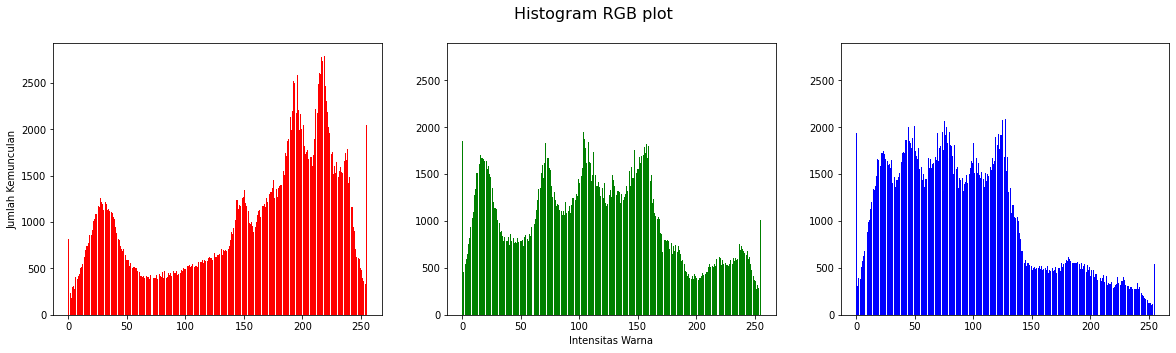

In [ ]:
# Tugas Praktikum Histogram gambar citra lena.jpg

# Input image
input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

red = []
green = []
blue = []

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
for i in range(input_image.shape[0]):
  for j in range(input_image.shape[1]):
    red.append(input_image[i,j,0])
    green.append(input_image[i,j,1])
    blue.append(input_image[i,j,2])

# Membuat histogram
intensitasMax = 255
fig, axs = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle('Histogram RGB plot', fontsize=16)

# Red channel
axs[0].hist(red, intensitasMax, facecolor='red', rwidth=0.85)
axs[0].set_ylabel('Jumlah Kemunculan')

# Green channel
axs[1].hist(green, intensitasMax, facecolor='green', rwidth=0.85)
axs[1].set_xlabel('Intensitas Warna')
axs[1].set_ylim([0, 2900])

# Blue channel
axs[2].hist(blue, intensitasMax, facecolor='blue', rwidth=0.85)
axs[2].set_ylim([0, 2900])
plt.show

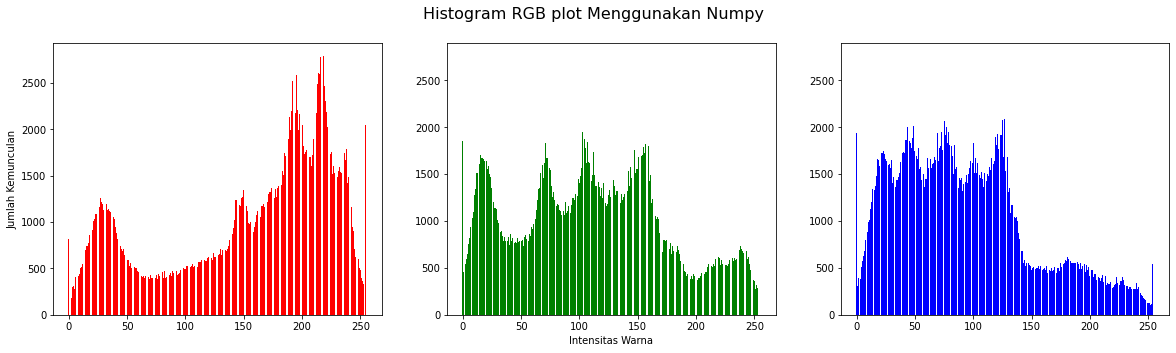


Dari hasil output dapat diketahui bahwa hasil menggunakan Numpy Histogram sama dengan hasil pada nomer 3,
tetapi jika menggunakan numpy tidak dapat divisualisasikan tanpa menggunakan matplotlib.



In [ ]:
# Tugas Praktikum Histogram menggunakan numpy

# Menghitung histogram menggunakan numpy
red_histogram = np.histogram(red, bins=255)
green_histogram = np.histogram(green, bins=255)
blue_histogram = np.histogram(blue, bins=255)

# Menambahkan satu data pada data array histogram
r1 = red_histogram[1]
r2 = red_histogram[0]
r2 = np.append(r2, 0)

g1 = green_histogram[1]
g2 = green_histogram[0]
g2 = np.append(g2, 0)

b1 = blue_histogram[1]
b2 = blue_histogram[0]
b2 = np.append(b2, 0)

# Membuat histogram
fig, axs = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle('Histogram RGB plot Menggunakan Numpy', fontsize=16)

# Red channel
axs[0].bar(r1, r2, color='red')
axs[0].set_ylabel('Jumlah Kemunculan')

# # Green channel
axs[1].bar(g1, g2, color='green')
axs[1].set_xlabel('Intensitas Warna')
axs[1].set_ylim([0, 2900])

# # Blue channel
axs[2].bar(b1, b2, color='blue')
axs[2].set_ylim([0, 2900])
plt.show()

print("\nDari hasil output dapat diketahui bahwa hasil menggunakan Numpy Histogram sama dengan hasil pada nomer 3,")
print("tetapi jika menggunakan numpy tidak dapat divisualisasikan tanpa menggunakan matplotlib.\n")

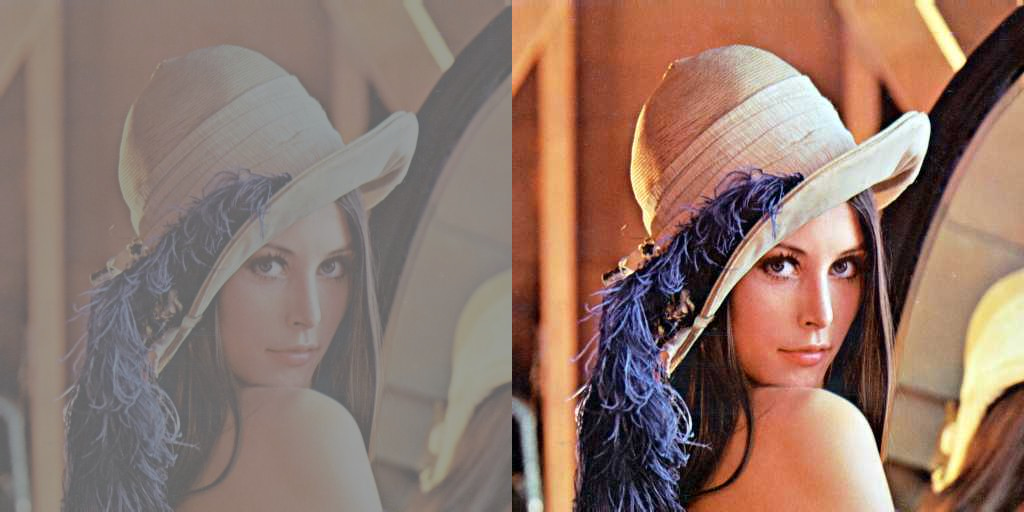

<function matplotlib.pyplot.show>

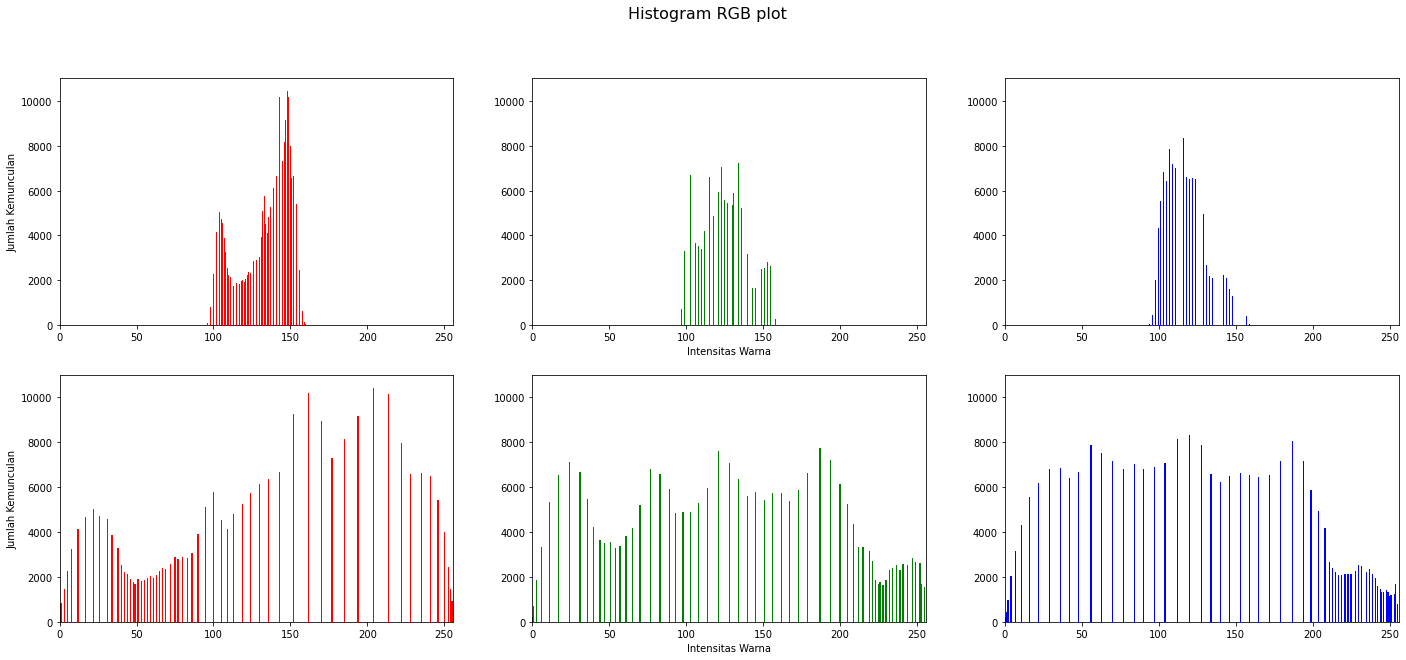

In [ ]:
# Tugas Praktikum Histogram equalization

# Input image
input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
output_image = input_image.copy()
lena = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')

red = []
green = []
blue = []

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
for i in range(input_image.shape[0]):
  for j in range(input_image.shape[1]):
    red.append(input_image[i,j,0])
    green.append(input_image[i,j,1])
    blue.append(input_image[i,j,2])

# membuat list dari 0-255
pixels=[]
for x in range(256):
  pixels.append(x)

def histogram_equalization(image):
  # set lebar dan tinggi gambar
  width=input_image.shape[1]
  height = input_image.shape[0]
  size=width*height
  counts=[]

  # untuk setiap intensity level
  for i in pixels:

    # set counter to 0
    temp=0

    # akses pixels
    for x in range(width):
      for y in range(height):

        # jika pixel intensity sama dengan intensity level
        # menambah counter
        if (image[x,y]==i):
          temp=temp+1
    
    # tambahkan frekuensi level intensitas
    counts.append(temp)

  # pembagian dengan jumlah pixel
  pdf=[]
  for i in counts:
    pdf.append(i/size)

  # penjumlahan kumulatif freakuensi
  cdf=[]
  total=0
  for i in pdf:
    total=total+i
    cdf.append(total)

  # implementasi rumus skala warna
  tr=[]
  for i in cdf:
    t=round(i*255)
    tr.append(t)

  # hasil histogram equalization
  hs=[]
  for i in pixels:
    count=0
    tot=0
    for j in tr:
      if (j==i):
        tot=tot+counts[count]
      count=count+1
    hs.append(tot)
  
  return hs

r = histogram_equalization(input_image[:,:,0])
g = histogram_equalization(input_image[:,:,1])
b = histogram_equalization(input_image[:,:,2])

input_image = cv.cvtColor(input_image, cv.COLOR_RGB2BGR)
output_image = lena
final_frame = cv.hconcat((input_image, output_image))
cv2_imshow(final_frame)

# Membuat histogram
intensitasMax = 255
fig, axs = plt.subplots(2, 3, figsize=(24,10))

fig.suptitle('Histogram RGB plot', fontsize=16)

# Red channel
axs[0,0].hist(red, intensitasMax, facecolor='red', alpha=1)
axs[0,0].set_ylabel('Jumlah Kemunculan')
axs[0,0].set_xlim([0, 256])
axs[0,0].set_ylim([0, 11000])

# Green channel
axs[0,1].hist(green, intensitasMax, facecolor='green', alpha=1)
axs[0,1].set_xlabel('Intensitas Warna')
axs[0,1].set_xlim([0, 256])
axs[0,1].set_ylim([0, 11000])

# Blue channel
axs[0,2].hist(blue, intensitasMax, facecolor='blue', alpha=1)
axs[0,2].set_xlim([0, 256])
axs[0,2].set_ylim([0, 11000])

# Red channel
axs[1,0].bar(pixels, r, color='red')
axs[1,0].set_ylabel('Jumlah Kemunculan')
axs[1,0].set_xlim([0, 256])
axs[1,0].set_ylim([0, 11000])

# Green channel
axs[1,1].bar(pixels, g, color='green')
axs[1,1].set_xlabel('Intensitas Warna')
axs[1,1].set_xlim([0, 256])
axs[1,1].set_ylim([0, 11000])

# Blue channel
axs[1,2].bar(pixels, b, color='blue')
axs[1,2].set_xlim([0, 256])
axs[1,2].set_ylim([0, 11000])
plt.show

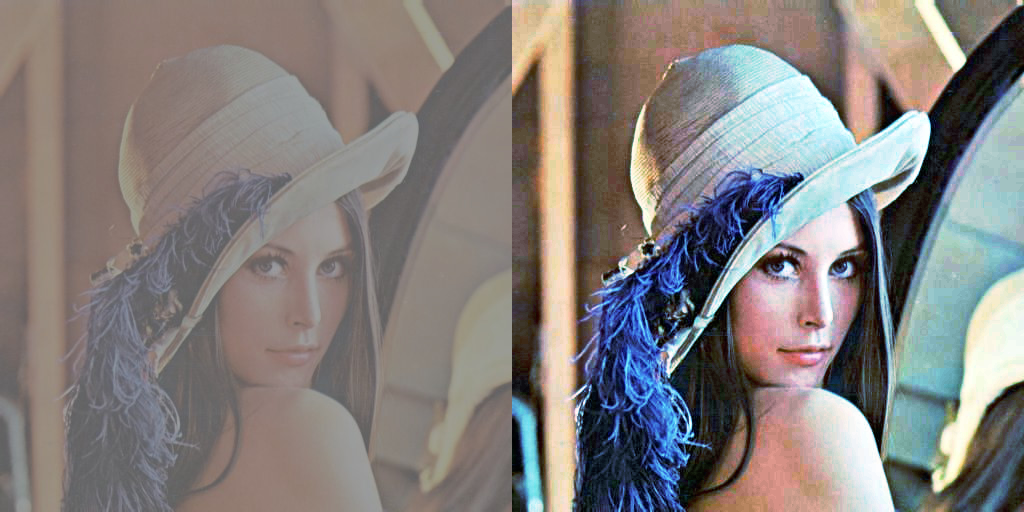

<function matplotlib.pyplot.show>

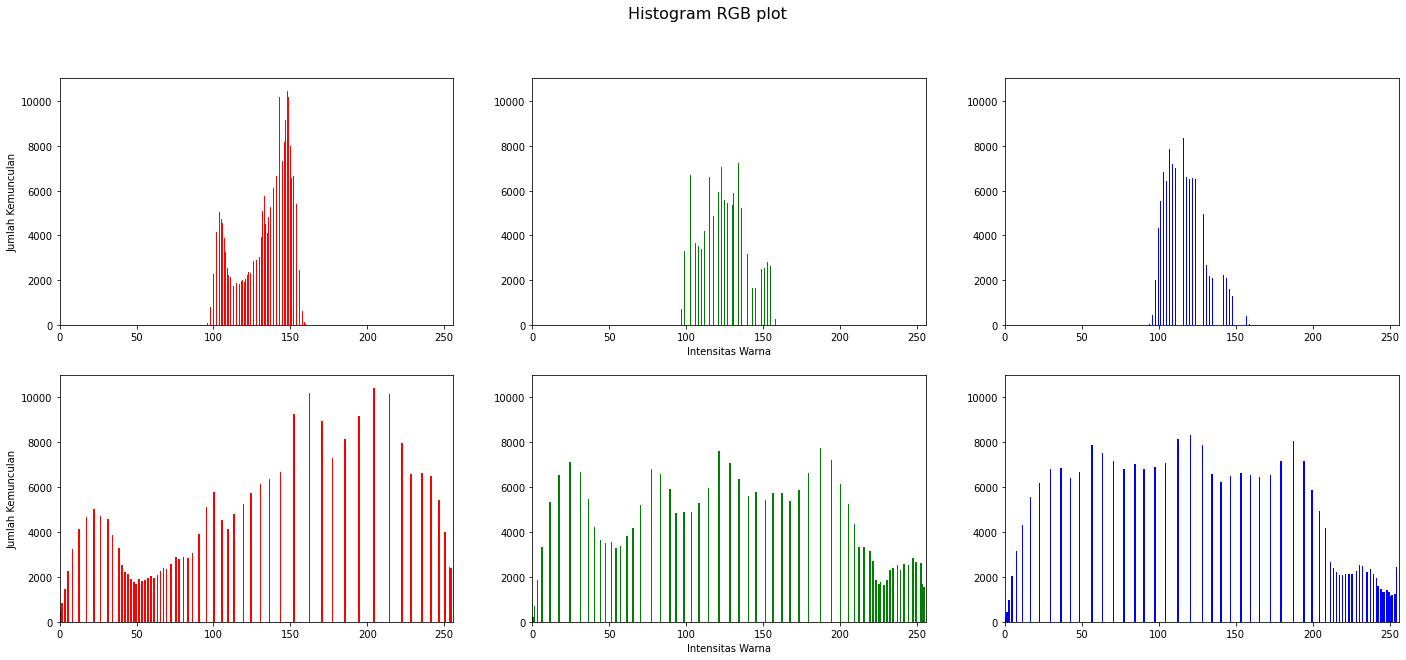

In [ ]:
# Histogram Equalization menggunakan library cv2 equalizeHist

input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
output_image = input_image.copy()

# Menggunakan library equalizeHist
for i in range(3):
  output_image[:,:,i] = cv.equalizeHist(output_image[:,:,i])

red = []
green = []
blue = []

red2 = []
green2 = []
blue2 = []

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
for i in range(input_image.shape[0]):
  for j in range(input_image.shape[1]):
    red.append(input_image[i,j,0])
    green.append(input_image[i,j,1])
    blue.append(input_image[i,j,2])

    red2.append(output_image[i,j,0])
    green2.append(output_image[i,j,1])
    blue2.append(output_image[i,j,2])

input_image = cv.cvtColor(input_image, cv.COLOR_RGB2BGR)
output_image = cv.cvtColor(output_image, cv.COLOR_RGB2BGR)
final_frame = cv.hconcat((input_image, output_image))
cv2_imshow(final_frame)

# Membuat histogram
intensitasMax = 255
fig, axs = plt.subplots(2, 3, figsize=(24,10))

fig.suptitle('Histogram RGB plot', fontsize=16)

# Red channel
axs[0,0].hist(red, intensitasMax, facecolor='red', alpha=1)
axs[0,0].set_ylabel('Jumlah Kemunculan')
axs[0,0].set_xlim([0, 256])
axs[0,0].set_ylim([0, 11000])

# Green channel
axs[0,1].hist(green, intensitasMax, facecolor='green', alpha=1)
axs[0,1].set_xlabel('Intensitas Warna')
axs[0,1].set_xlim([0, 256])
axs[0,1].set_ylim([0, 11000])

# Blue channel
axs[0,2].hist(blue, intensitasMax, facecolor='blue', alpha=1)
axs[0,2].set_xlim([0, 256])
axs[0,2].set_ylim([0, 11000])

# Red channel
axs[1,0].hist(red2, intensitasMax, facecolor='red', alpha=1)
axs[1,0].set_ylabel('Jumlah Kemunculan')
axs[1,0].set_xlim([0, 256])
axs[1,0].set_ylim([0, 11000])

# Green channel
axs[1,1].hist(green2, intensitasMax, facecolor='green', alpha=1)
axs[1,1].set_xlabel('Intensitas Warna')
axs[1,1].set_xlim([0, 256])
axs[1,1].set_ylim([0, 11000])

# Blue channel
axs[1,2].hist(blue2, intensitasMax, facecolor='blue', alpha=1)
axs[1,2].set_xlim([0, 256])
axs[1,2].set_ylim([0, 11000])
plt.show

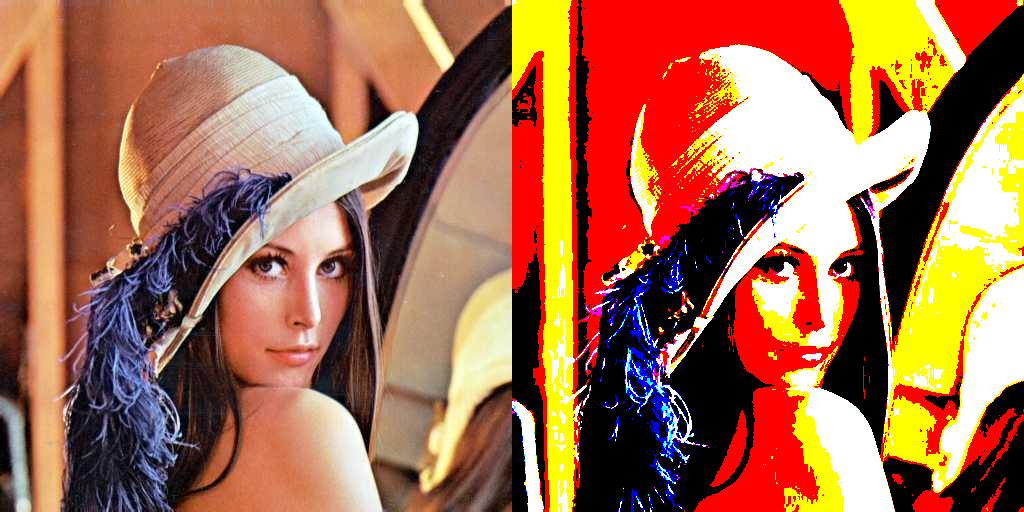

In [ ]:
# Pemetaan 16 juta warna RGB ke dalam 8 warna

input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')
output_image = input_image.copy()

for i in range(input_image.shape[0]):
  for j in range(input_image.shape[1]):
    # jarak pixel tetangga
    pixelBlueOld = input_image[i,j,0]
    pixelGreenOld = input_image[i,j,1]
    pixelRedOld = input_image[i,j,2]
    jarakPixel = 1

    # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
    pixelBlueNew = np.round(jarakPixel * pixelBlueOld / 255) * (255/jarakPixel)
    pixelGreenNew = np.round(jarakPixel * pixelGreenOld / 255) * (255/jarakPixel)
    pixelRedNew = np.round(jarakPixel * pixelRedOld / 255) * (255/jarakPixel)

    # mengganti nilai pixel dengan nilai pixel yang telah disederhanakan
    output_image[i,j,0] = pixelBlueNew
    output_image[i,j,1] = pixelGreenNew
    output_image[i,j,2] = pixelRedNew

final_frame = cv.hconcat((input_image, output_image))
cv2_imshow(final_frame)

Gambar Asli


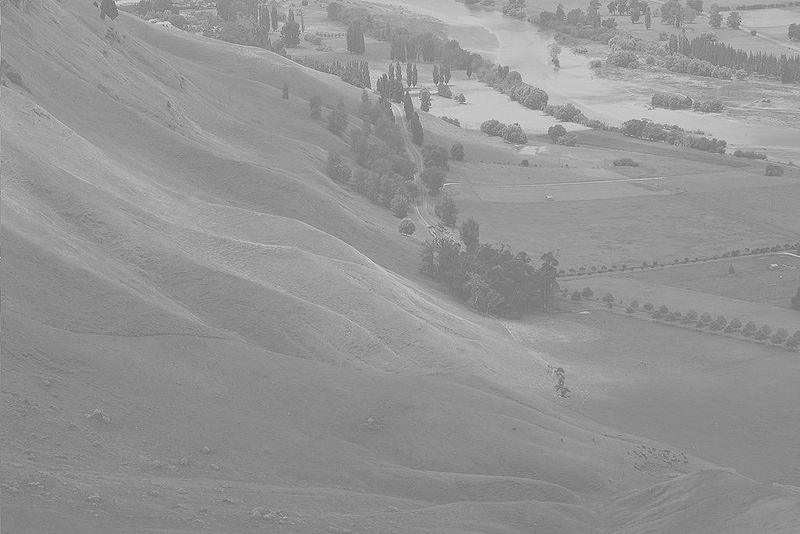


Hasil Dithering dengan jarak tetangga 1 pixel


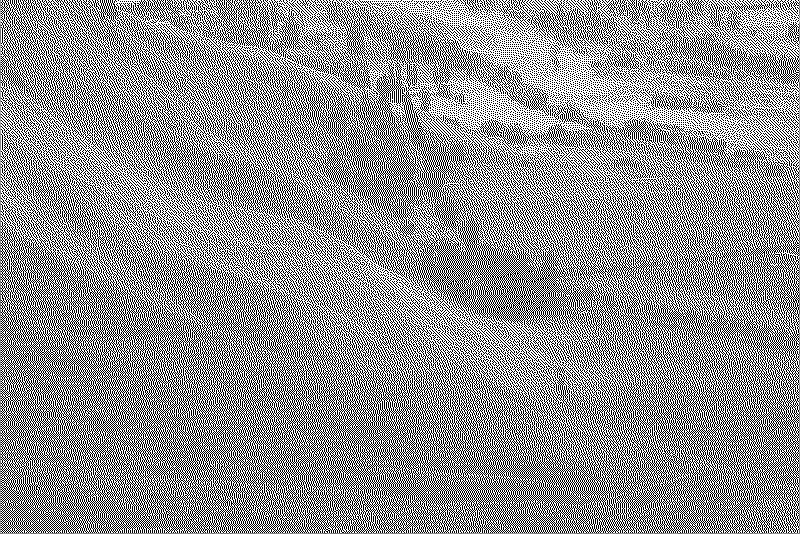

In [ ]:
# Proses dithering Floyd and Steinberg 

input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/wiki.jpg')
output_image = input_image.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]
     
    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            old_b = img[y, x, 0]
            old_g = img[y, x, 1]
            old_r = img[y, x, 2]
            
            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new_b = np.round(jarakPixel * old_b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * old_g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * old_r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1, 0] = minmax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = minmax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = minmax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)
            
            img[y+1, x-1, 0] = minmax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = minmax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = minmax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            img[y+1, x, 0] = minmax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = minmax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = minmax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)


            img[y+1, x+1, 0] = minmax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = minmax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = minmax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

output_image = dithering_color(output_image, 1)
print("Gambar Asli")
cv2_imshow(input_image)
print("\nHasil Dithering dengan jarak tetangga 1 pixel")
cv2_imshow(output_image)